<a href="https://colab.research.google.com/github/ryoiwata/neural_allstars/blob/main/ExploringNMADataset_Stringer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Get numpy in as np for ease
import numpy as np
#Get matplotlib for plotting
import matplotlib.pyplot as plt

# @title Data retrieval
import os, requests

fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

# @title Data loading

dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()


# Explore/Understand the data set


dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])


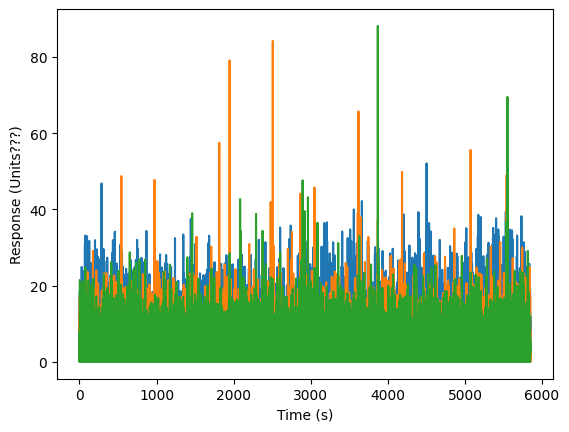

In [29]:
print(dat.keys())

# Isolate the neuronal activity
TimeBinnedNeuronal = dat['sresp'];

# make a time axis
timeax1Full = np.linspace(0,len(TimeBinnedNeuronal[1,:])/1.2, len(TimeBinnedNeuronal[1,:]))

#plot activity for 3 neurons as a test
for neuron in range(0,3):
  plt.plot(timeax1Full, TimeBinnedNeuronal[neuron,:])
  plt.ylabel('Response (Units???)')
  plt.xlabel('Time (s)')